In [35]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from PIL import Image
import random

# Target folders to process (converted to dictionary for consistency)
target_folders = {
    "mi": "/kaggle/input/heartlens-d1/ECG Images of Myocardial Infarction Patients (240x12=2880)",
    "normal": "/kaggle/input/heartlens-d1/Normal Person ECG Images (284x12=3408)",
    "abnormal_heartbeat": "/kaggle/input/heartlens-d1/ECG Images of Patient that have abnormal heartbeat (233x12=2796)",
    "history_of_MI": "/kaggle/input/heartlens-d1/ECG Images of Patient that have History of MI (172x12=2064)"
    
}

# Counter dictionary
file_counts = defaultdict(int)

# Loop through folders and count files
for label, folder in target_folders.items():
    count = sum(len(files) for _, _, files in os.walk(folder))
    file_counts[label] = count

# Print summary
for label, count in file_counts.items():
    print(f"{label}: {count}")





mi: 239
normal: 284
abnormal_heartbeat: 233
history_of_MI: 172


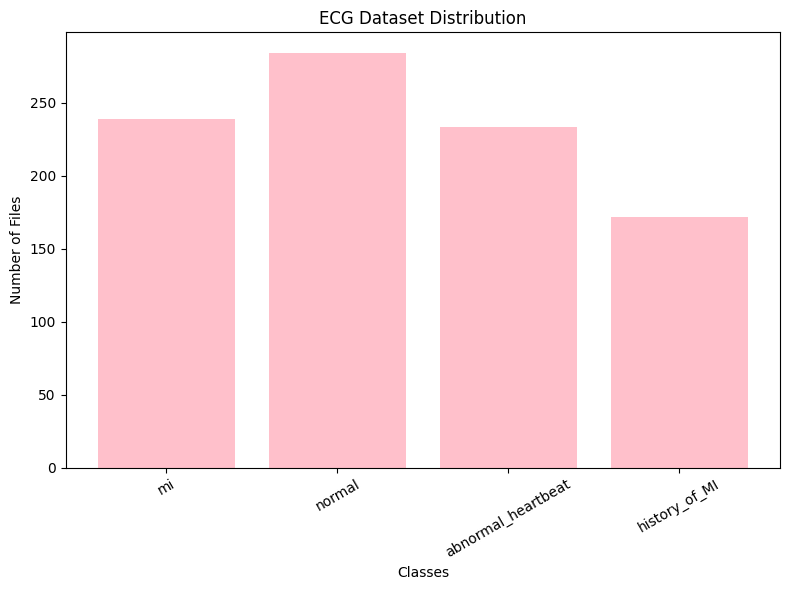

In [36]:
# Visualization
labels = list(file_counts.keys())
values = list(file_counts.values())

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color= 'pink')
plt.title("ECG Dataset Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Files")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

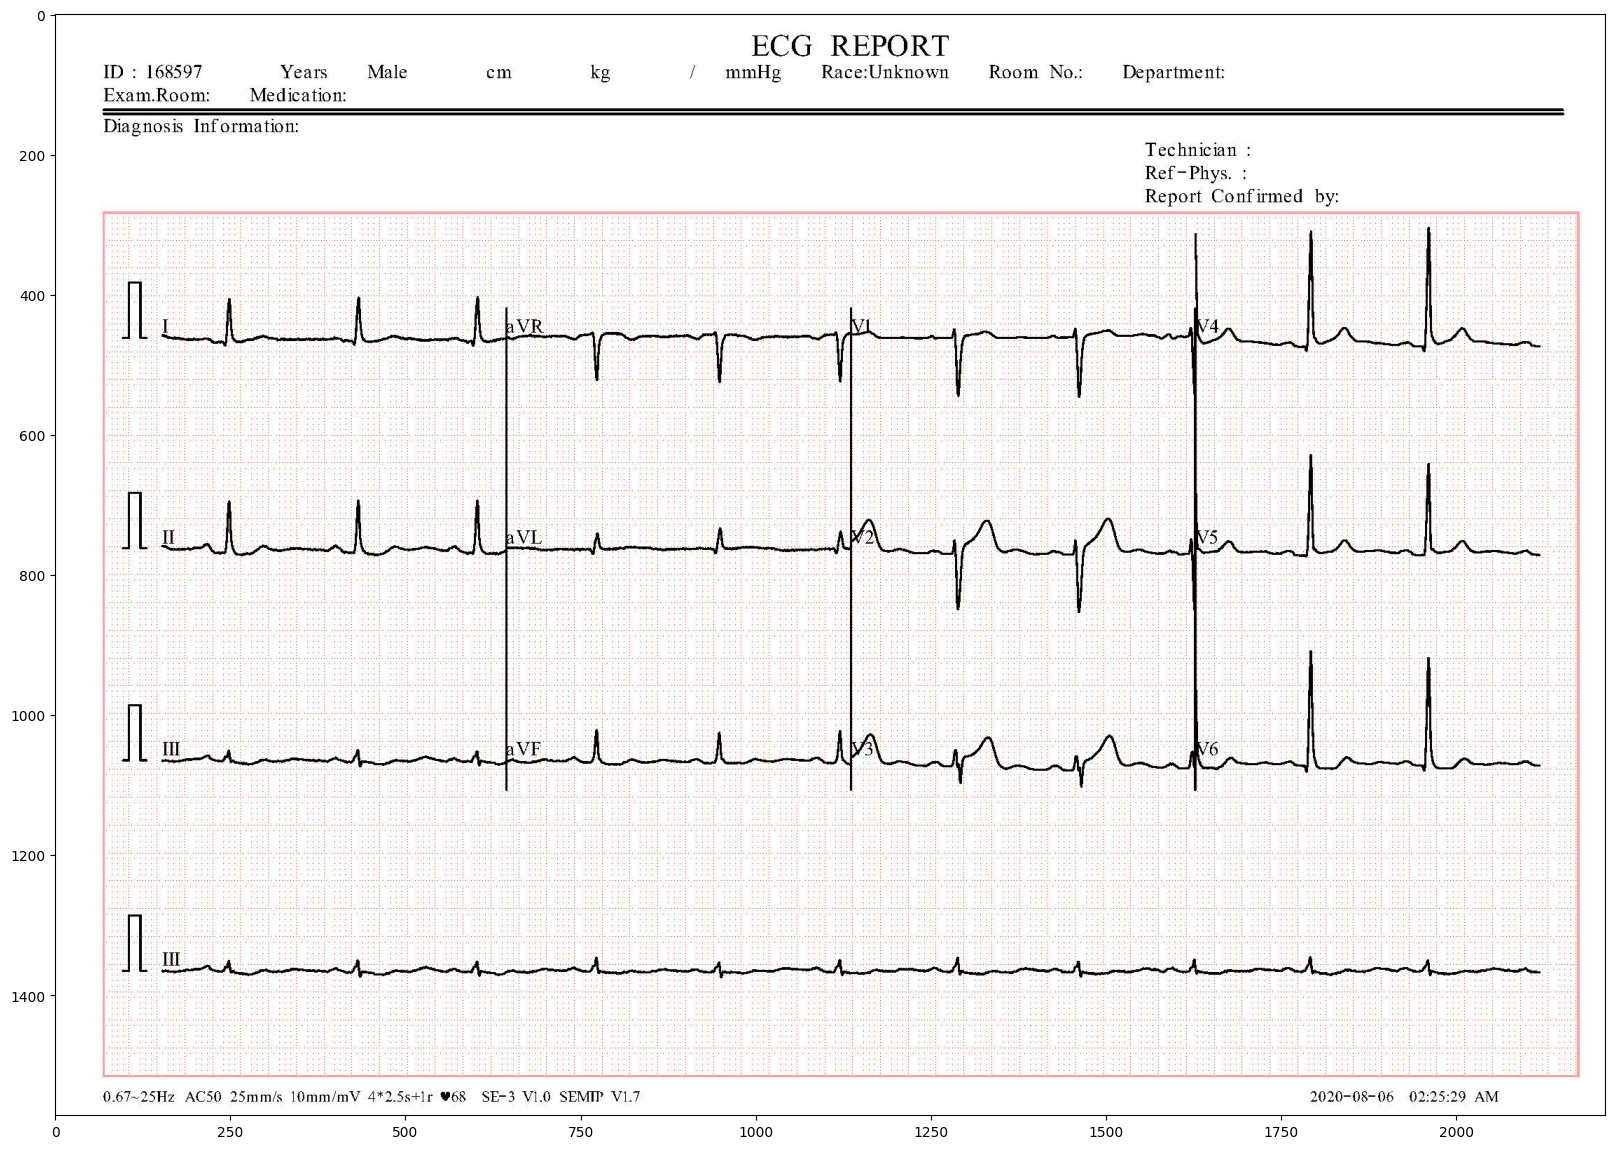

In [37]:
import os
from skimage.io import imread
import matplotlib.pyplot as plt

# pick which class folder you want to load from
folder = target_folders['normal']   # or 'mi', 'abnormal_heartbeat', 'history_of_MI'
filename = 'Normal(2).jpg'          

# build the full path
image_path = os.path.join(folder, filename)

# display
fig, ax = plt.subplots(figsize=(20, 20))
image = imread(image_path)
ax.imshow(image)
ax.axis('on') #on/off displays/remove axis
plt.show()


In [38]:
#dividing the ECG leads from 1-13 from the above image

# These crop coordinates were determined by inspecting
# the layout of that big printout. 
Lead_1 = image[300:600, 150:643]
Lead_2 = image[300:600, 646:1135]
Lead_3 = image[300:600, 1140:1625]
Lead_4 = image[300:600, 1630:2125]
Lead_5 = image[600:900, 150:643]
Lead_6 = image[600:900, 646:1135]
Lead_7 = image[600:900, 1140:1625]
Lead_8 = image[600:900, 1630:2125]
Lead_9 = image[900:1200, 150:643]
Lead_10 = image[900:1200, 646:1135]
Lead_11 = image[900:1200, 1140:1625]
Lead_12 = image[900:1200, 1630:2125]
Lead_13 = image[1250:1480, 150:2125]

Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

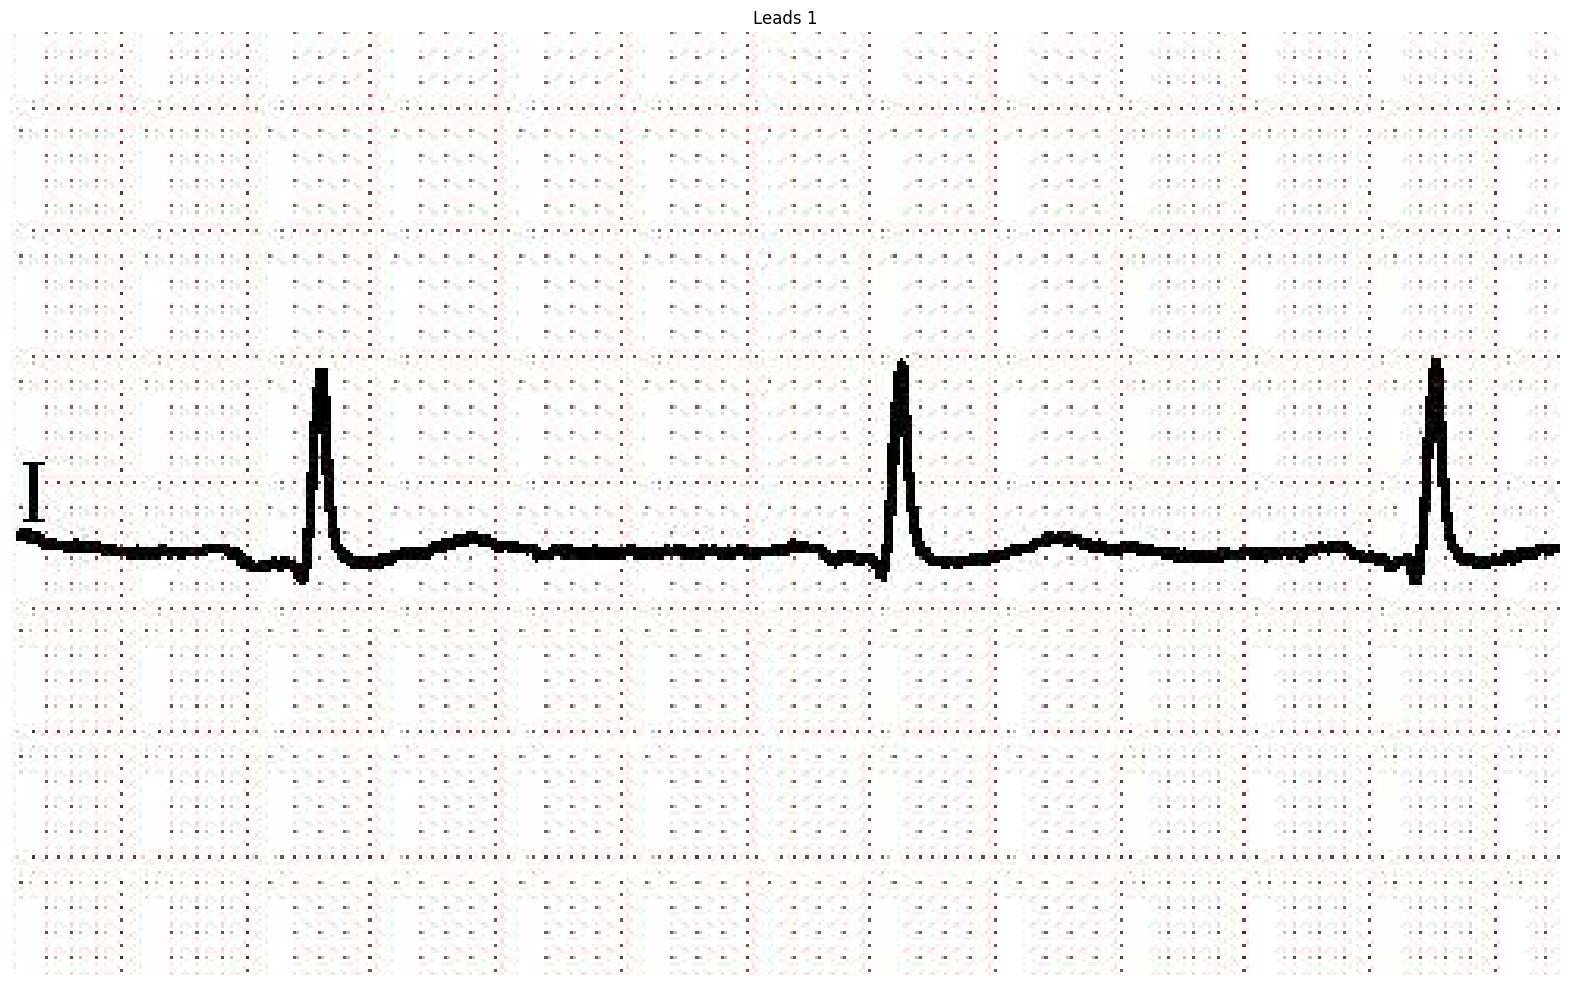

In [41]:
#plotting lead 
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(20, 20)

ax1.imshow(Lead_1)
ax1.set_title("Leads 1")
ax1.axis('off')
plt.show()

TRANSFORMAING ECG IMAGES: REMOVING GRIDLINES/ PERFROM THRESHOLDING, BINARIZATION, GAUSSIAN FILTERING

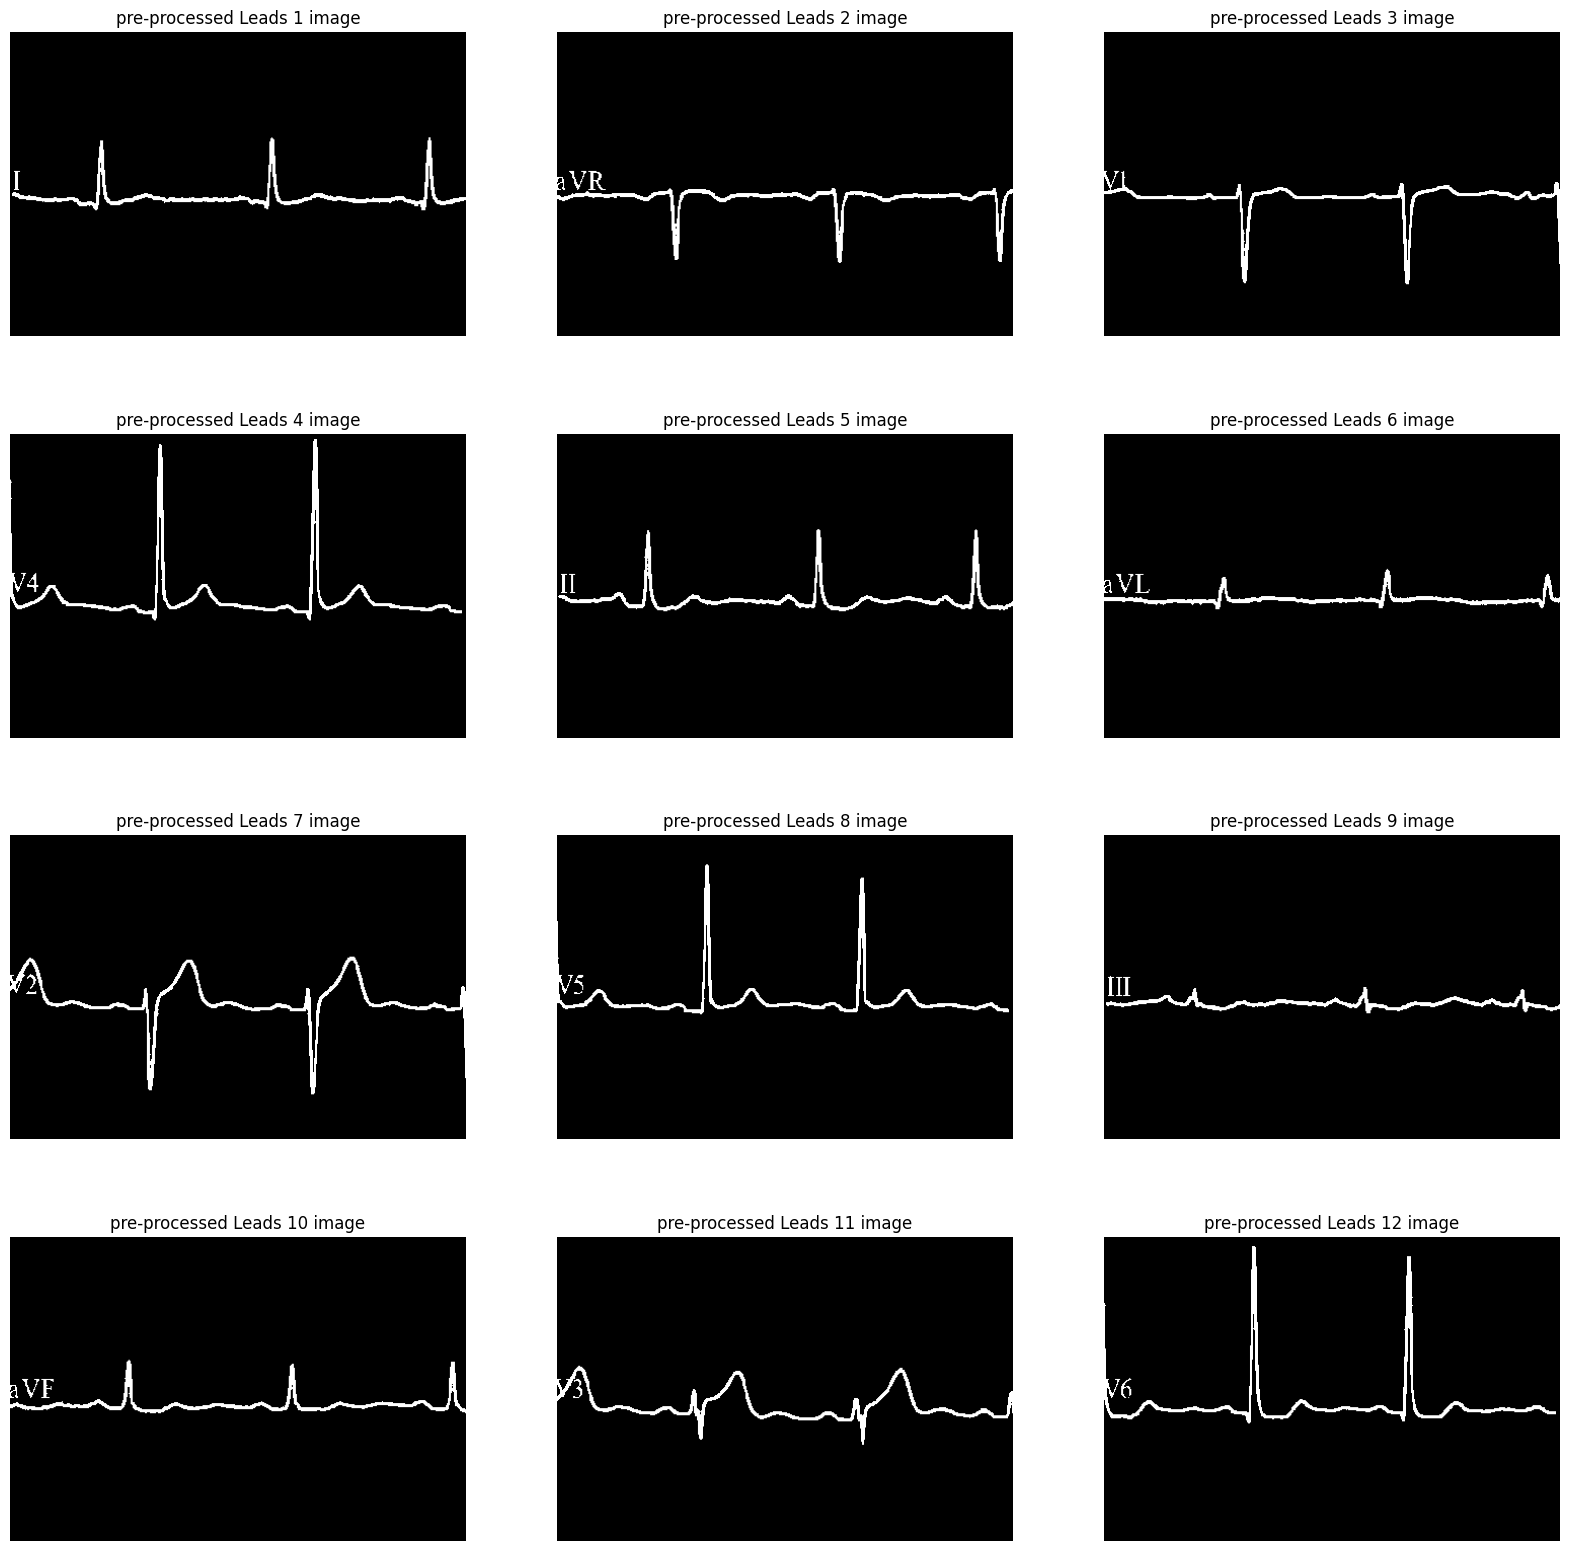

In [7]:
#importing gaussian filter and otsu threshold
from skimage.filters import threshold_otsu,gaussian
from skimage.transform import resize
from numpy import asarray
from skimage import color
import matplotlib.pyplot as plt

#creating subplot of size(4,3) 4 rows and 3 columns
fig2 , ax2 = plt.subplots(4,3)

fig2.set_size_inches(20, 20)

#setting counter for plotting based on value
x_counter=0
y_counter=0

#looping through image list containg all leads from 1-12
for x,y in enumerate(Leads[:len(Leads)-1]):
  #converting to gray scale
  grayscale = color.rgb2gray(y)
  #smoothing image
  blurred_image = gaussian(grayscale, sigma=0.7)
  #thresholding to distinguish foreground and background
  #using otsu thresholding for getting threshold value
  global_thresh = threshold_otsu(blurred_image)

  #creating binary image based on threshold
  binary_global = blurred_image < global_thresh
  #resize image
  binary_global = resize(binary_global, (300, 450))

  if (x+1)%3==0:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    y_counter+=1
 
#plot the image
plt.show()

0.5587324837823797


(-0.5, 484.5, 299.5, -0.5)

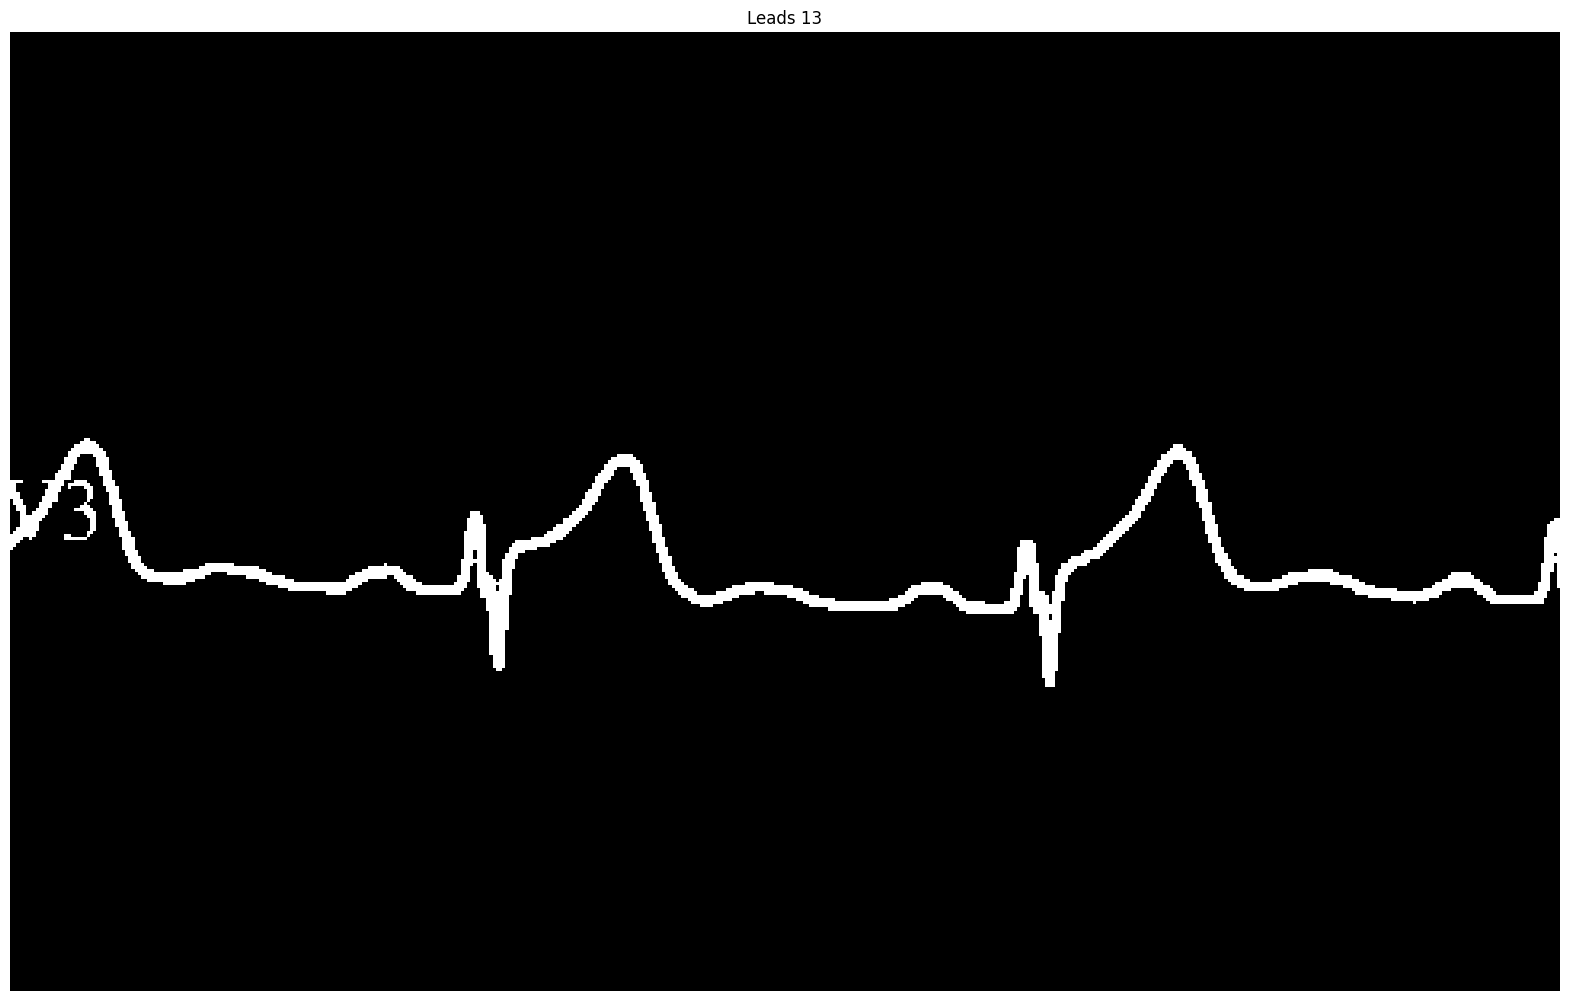

In [8]:
#plotting lead 13
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(20, 20)

#converting to gray scale
grayscale = color.rgb2gray(Lead_11)
#smoothing image
blurred_image = gaussian(grayscale, sigma=0.7)
#thresholding to distinguish foreground and background
#using otsu thresholding for getting threshold value
global_thresh = threshold_otsu(blurred_image)
print(global_thresh)
#Any pixel below this value becomes white (True) in the binary image.
#Any pixel above this value becomes black (False).

#creating binary image based on threshold
binary_global = blurred_image < global_thresh
ax3.imshow(binary_global,cmap='gray')
ax3.set_title("Leads 13")
ax3.axis('off')

PERFROM CONTOURS TO SEPERATE ONLY THE SIGNAL FROM IMAGE

[(955, 2)]


Text(0.5, 1.0, 'Sample pre-processed Leads 13 image')

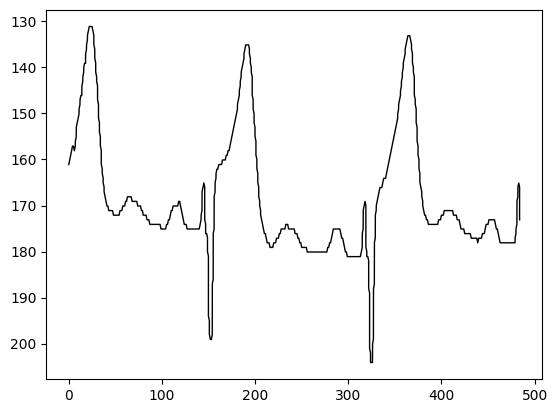

In [9]:
#import measure
from skimage import measure
import scipy.ndimage as ndimage    

#finding contour
contours = measure.find_contours(binary_global,0.9)

# Shows the image with contours found
fig4, ax4 = plt.subplots()

plt.gca().invert_yaxis()

contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
print(contours_shape)
for contour in contours:
  if contour.shape in contours_shape:
    test = resize(contour, (255, 2))
    ax4.plot(contour[:, 1], contour[:, 0],linewidth=1,color='black')
ax1.axis('image')
ax1.set_title("Sample pre-processed Leads 13 image")

In [10]:
contours_shape = sorted([x.shape for x in contours])[::-1][0:3]
contours_shape

[(955, 2), (925, 2), (39, 2)]

In [11]:
test.shape

(255, 2)

CONVERT IMAGE TO SIGNAL

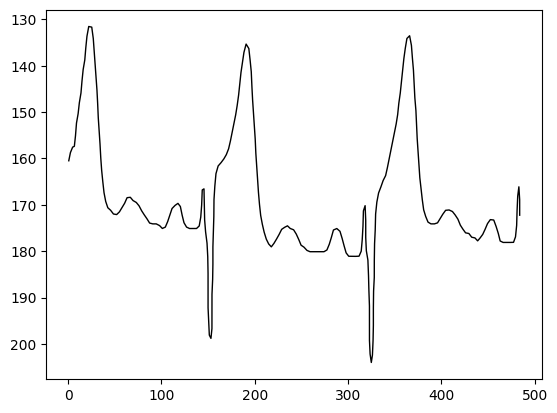

In [12]:
#import pandas
import pandas as pd

#convert contour to dataframe
df = pd.DataFrame(test, columns = ['X','Y'])
fig5, ax5 = plt.subplots()

plt.gca().invert_yaxis()

#plot the image
ax5.plot(df['Y'],df['X'],linewidth=1,color='black',linestyle='solid')

#save the image
fig5.savefig('Lead13_Signal.png')

SAVE SIGNAL TO CSV FORMAT

In [13]:
#convert to CSV
df.to_csv('data.csv',index=False)

#View CSV data for verification
test_df=pd.read_csv('data.csv')
test_df

X           Y
0    172.230253  483.917732
1    168.884563  483.892338
2    166.109531  483.062749
3    168.108531  481.821655
4    171.345143  481.116866
..          ...         ...
250  155.113914    7.805229
251  157.385025    6.579276
252  157.555234    4.757120
253  158.743544    2.365713
254  160.494929    0.605071

[255 rows x 2 columns]

SCALING THE DATA & STORE IN CSV

In [14]:
#scaling the data and testing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

fit_transform_data = scaler.fit_transform(df)
Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
Normalized_Scaled

X         Y
0    0.561687  1.000000
1    0.515495  0.999947
2    0.477182  0.998231
3    0.504781  0.995663
4    0.549467  0.994205
..        ...       ...
250  0.325372  0.014898
251  0.356728  0.012361
252  0.359078  0.008591
253  0.375484  0.003643
254  0.399664  0.000000

[255 rows x 2 columns]

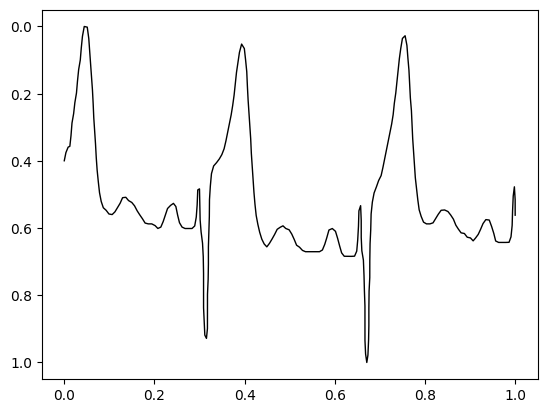

In [15]:
#plotting scaled data to test signal shape
import pandas as pd

df = pd.DataFrame(Normalized_Scaled, columns = ['X','Y'])

fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(Normalized_Scaled['Y'],Normalized_Scaled['X'],linewidth=1,color='black',linestyle='solid')

In [16]:
#scaled_data to CSV
Normalized_Scaled.to_csv('scaled_data.csv',index=False)
#reading CSV to test
test_scaled_df=pd.read_csv('scaled_data.csv')
test_scaled_df

X         Y
0    0.561687  1.000000
1    0.515495  0.999947
2    0.477182  0.998231
3    0.504781  0.995663
4    0.549467  0.994205
..        ...       ...
250  0.325372  0.014898
251  0.356728  0.012361
252  0.359078  0.008591
253  0.375484  0.003643
254  0.399664  0.000000

[255 rows x 2 columns]

In [17]:
# For now save the X axis as a seperate csv file (1D) as it seems to corresponds the high and low points and y axis corresponds to curve/shape.
#scaled_data to CSV
Normalized_Scaled['X'].to_csv('scaled_data_X.csv',index=False)
#reading CSV to test
test_scaled_df_X=pd.read_csv('scaled_data_X.csv')
test_scaled_df_X.shape

(255, 1)

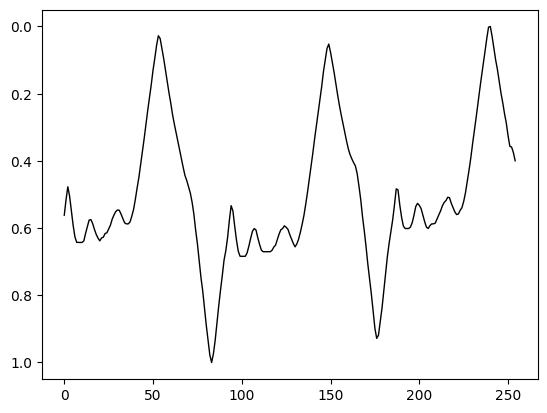

In [18]:
#plotting 1D signal
import pandas as pd

test_plot_df = pd.DataFrame(test_scaled_df_X, columns = ['X'])
fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(test_plot_df,linewidth=1,color='black',linestyle='solid')

#Confirms scaling did not distort the waveform – just rescaled axes.

TRANSPOSE THE DATAFRAME

In [19]:
#transpose the 1D scaled dataframe
test_transpose = test_scaled_df_X.T
test_transpose

#For classical 1‑D algorithms (FFT, peak detection, vanilla classifiers) you often only need the vertical signal (how the voltage changes) – the x‑index is assumed to be equally spaced.
#Many ML libraries expect each ECG example to be a row vector. I'm preparing the data in that format.

0         1         2         3         4         5         6    \
X  0.561687  0.515495  0.477182  0.504781  0.549467  0.591941  0.626151   

        7         8         9    ...       245       246       247       248  \
X  0.642387  0.642728  0.642728  ...  0.162724  0.197925  0.226878  0.259573   

        249       250       251       252       253       254  
X  0.287399  0.325372  0.356728  0.359078  0.375484  0.399664  

[1 rows x 255 columns]

**PERFORMING DATA PREPROCESSING/FEATURE EXTRACTION ON ALL THE FILES IN THE heartlens-d1 FOLDER**

In [7]:
# ECG Lead Extraction - Single Category Version
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from skimage.io import imread
import glob

# *** CONFIGURATION - MODIFY THIS SETTING ***
# Set the category you want to process
TARGET_CATEGORY = "history_of_MI"  # Options: "mi", "normal", "abnormal_heartbeat", "history_of_MI"

# Define the category display name
category_display_names = {
    "mi": "MI",
    "normal": "Normal",
    "abnormal_heartbeat": "Abnormal",
    "history_of_MI": "HofMI"
}

# Output directory name in the working directory
output_base_dir = "/kaggle/working/lead_outputs"

# First, check what paths are actually available in the Kaggle environment
base_input_dir = "/kaggle/input"
dataset_folders = glob.glob(os.path.join(base_input_dir, "*"))
print("Available datasets:", dataset_folders)

# For the heartlens dataset, list all subdirectories
heartlens_folders = []
for folder in dataset_folders:
    if "heartlens" in folder.lower():
        heartlens_folders = glob.glob(os.path.join(folder, "*"))
        print(f"Found heartlens dataset at {folder}")
        print("Subfolders:", heartlens_folders)
        break

# Define keyword mapping for folders to categories
category_keyword_mapping = {
    "mi": "myocardial",
    "normal": "normal", 
    "abnormal_heartbeat": "abnormal",
    "history_of_MI": "history"
}

# Find the source folder for the target category
source_folder = None
for folder_path in heartlens_folders:
    folder_name = os.path.basename(folder_path).lower()
    if category_keyword_mapping[TARGET_CATEGORY] in folder_name:
        source_folder = folder_path
        print(f"Found source folder for {TARGET_CATEGORY}: {source_folder}")
        break

if not source_folder:
    print(f"ERROR: Could not find source folder for category '{TARGET_CATEGORY}'")
    exit(1)

# Create output directory structure for the target category
output_folder = os.path.join(output_base_dir, category_display_names[TARGET_CATEGORY])
os.makedirs(output_folder, exist_ok=True)
print(f"Output folder created: {output_folder}")

# Initialize file counter
file_count = 0

def Convert_Image_Lead(image_file, source_folder):
    # Read the image
    try:
        import imageio
        image = imageio.imread(os.path.join(source_folder, image_file))
    except:
        # Fallback to skimage without plugin if imageio fails
        image = imread(os.path.join(source_folder, image_file))
    
    # Dividing the ECG leads from 1-13 from the image
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1626]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1626]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1626]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]
    
    # List of leads
    Leads = [Lead_1, Lead_2, Lead_3, Lead_4, Lead_5, Lead_6, Lead_7, 
             Lead_8, Lead_9, Lead_10, Lead_11, Lead_12, Lead_13]
    
    # Create patient folder name 
    patient_folder = os.path.join(output_folder, f"{category_display_names[TARGET_CATEGORY]}({file_count})")
    os.makedirs(patient_folder, exist_ok=True)
    
    # Loop through leads and create separate images
    for lead_num, lead_image in enumerate(Leads, 1):
        fig, ax = plt.subplots()
        ax.imshow(lead_image)
        ax.axis('off')
        ax.set_title(f"Lead {lead_num}")
        
        # Save the image
        output_path = os.path.join(patient_folder, f"Lead_{lead_num}_Signal.png")
        fig.savefig(output_path)
        plt.close(fig)
    
    return patient_folder

# Function to extract number from filename
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    if match:
        return int(match.group(1))
    return 0  # Default value if no number found

# Process images in the target category folder
print(f"Processing {TARGET_CATEGORY} images from {source_folder}")

# Check if the folder exists
if not os.path.exists(source_folder):
    print(f"Error: Source folder {source_folder} does not exist.")
    exit(1)
    
# Get all image files in the folder and sort them numerically
image_files = [f for f in os.listdir(source_folder) 
              if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Sort files numerically based on numbers in the filenames
image_files.sort(key=extract_number)

print(f"Found {len(image_files)} images in {TARGET_CATEGORY} category")

start_count = 1  # Start patient numbering from 1

# Process each image
for i, img_file in enumerate(image_files, start=start_count):
    file_count = i  # Update the file counter for this image
    print(f"  Converting image {i}/{len(image_files)}: {img_file}")
    output_path = Convert_Image_Lead(img_file, source_folder)
    print(f"  Saved leads to {output_path}")

# Print summary
print("\nProcessing complete! Summary:")
print(f"{category_display_names[TARGET_CATEGORY]}: {len(image_files)} images processed")
print(f"\nOutput saved to: {output_folder}")

Available datasets: ['/kaggle/input/heartlens-d1']
Found heartlens dataset at /kaggle/input/heartlens-d1
Subfolders: ['/kaggle/input/heartlens-d1/ECG Images of Patient that have abnormal heartbeat (233x12=2796)', '/kaggle/input/heartlens-d1/ECG Images of Patient that have History of MI (172x12=2064)', '/kaggle/input/heartlens-d1/Normal Person ECG Images (284x12=3408)', '/kaggle/input/heartlens-d1/ECG Images of Myocardial Infarction Patients (240x12=2880)']
Found source folder for history_of_MI: /kaggle/input/heartlens-d1/ECG Images of Patient that have History of MI (172x12=2064)
Output folder created: /kaggle/working/lead_outputs/HofMI
Processing history_of_MI images from /kaggle/input/heartlens-d1/ECG Images of Patient that have History of MI (172x12=2064)
Found 172 images in history_of_MI category
  Converting image 1/172: PMI(1).jpg


/tmp/ipykernel_31/2655259109.py:71: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(source_folder, image_file))


  Saved leads to /kaggle/working/lead_outputs/HofMI/HofMI(1)
  Converting image 2/172: PMI(2).jpg
  Saved leads to /kaggle/working/lead_outputs/HofMI/HofMI(2)
  Converting image 3/172: PMI(3).jpg
  Saved leads to /kaggle/working/lead_outputs/HofMI/HofMI(3)
  Converting image 4/172: PMI(4).jpg
  Saved leads to /kaggle/working/lead_outputs/HofMI/HofMI(4)
  Converting image 5/172: PMI(5).jpg
  Saved leads to /kaggle/working/lead_outputs/HofMI/HofMI(5)
  Converting image 6/172: PMI(6).jpg
  Saved leads to /kaggle/working/lead_outputs/HofMI/HofMI(6)
  Converting image 7/172: PMI(7).jpg
  Saved leads to /kaggle/working/lead_outputs/HofMI/HofMI(7)
  Converting image 8/172: PMI(8).jpg
  Saved leads to /kaggle/working/lead_outputs/HofMI/HofMI(8)
  Converting image 9/172: PMI(9).jpg
  Saved leads to /kaggle/working/lead_outputs/HofMI/HofMI(9)
  Converting image 10/172: PMI(10).jpg
  Saved leads to /kaggle/working/lead_outputs/HofMI/HofMI(10)
  Converting image 11/172: PMI(11).jpg
  Saved leads t

FUNCTION FOR IMAGE LEADS(1-13) PRE-PROCESSING & EXTRACTING SIGNAL CONTOURS

In [8]:
# ECG Signal Extraction - Single Category Version
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import color, measure
from skimage.filters import threshold_otsu, gaussian
from skimage.transform import resize
from sklearn.preprocessing import MinMaxScaler

# *** CONFIGURATION - MODIFY THIS SETTING ***
# Set the category you want to process
TARGET_CATEGORY = "HofMI"  # Options: "MI", "Normal", "Abnormal", "HofMI"

def extract_signal_leads(Leads, output_folder, category):
    """
    Extract signal from the ECG leads, preprocess them, generate contours,
    and save the results as images and CSV files.
    
    Parameters:
    -----------
    Leads : list
        List containing the lead images extracted from the ECG
    output_folder : str
        Path to the folder where the output files will be saved
    category : str
        Category of the ECG (MI, Normal, Abnormal, HofMI)
    """
    # Track how many leads were successfully processed
    successful_leads = 0
    
    # Loop through each lead image
    for lead_num, lead_image in enumerate(Leads, 1):
        try:
            print(f"    Processing Lead {lead_num}...")
            
            # Step 1: Convert to grayscale
            # Handle both RGB and RGBA images
            if lead_image.shape[-1] == 4:  # RGBA image
                # Convert RGBA to RGB by removing alpha channel
                rgb_image = lead_image[:, :, :3]
                grayscale = color.rgb2gray(rgb_image)
            else:  # RGB image
                grayscale = color.rgb2gray(lead_image)
            
            # Step 2: Apply Gaussian smoothing to reduce noise
            blurred_image = gaussian(grayscale, sigma=0.7)
            
            # Step 3: Apply Otsu thresholding to create a binary image
            global_thresh = threshold_otsu(blurred_image)
            binary_global = blurred_image < global_thresh
            
            # Step 4: Resize the binary image (except for lead 13 which has different dimensions)
            if lead_num != 13:
                binary_global = resize(binary_global, (300, 450))
            
            # Step 5: Save the preprocessed image
            fig1, ax1 = plt.subplots()
            ax1.imshow(binary_global, cmap="gray")
            ax1.axis('off')
            ax1.set_title(f"Pre-processed Lead {lead_num}")
            
            # Save the preprocessed image
            preprocessed_path = os.path.join(output_folder, f"Lead_{lead_num}_preprocessed_Signal.png")
            fig1.savefig(preprocessed_path)
            plt.close(fig1)
            
            # Step 6: Extract contours from the binary image
            fig2, ax2 = plt.subplots()
            plt.gca().invert_yaxis()  # Invert y-axis to match ECG convention
            
            # Find contours at level 0.8
            contours = measure.find_contours(binary_global, 0.8)
            
            # Guard against empty contours
            if len(contours) == 0:
                print(f"    Warning: No contours found for Lead {lead_num}!")
                plt.close(fig2)
                continue
                
            # Select the largest contour(s) as they likely represent the main ECG signal
            contours_shape = sorted([x.shape for x in contours], reverse=True)[0:1]
            
            # Variable to store the selected contour
            selected_contour = None
            
            for contour in contours:
                if contour.shape in contours_shape:
                    try:
                        # Resize the contour to have 255 points
                        selected_contour = resize(contour, (255, 2))
                        ax2.plot(selected_contour[:, 1], selected_contour[:, 0], linewidth=1, color='black')
                    except Exception as e:
                        print(f"    Error processing contour for Lead {lead_num}: {str(e)}")
                        selected_contour = None
            
            ax2.axis('image')
            ax2.set_title(f"Contour {lead_num}")
            
            # Save the contour image
            contour_path = os.path.join(output_folder, f"Lead_{lead_num}_Contour_Signal.png")
            fig2.savefig(contour_path)
            plt.close(fig2)
            
            # Step 7: Convert to 1D signal and scale
            if selected_contour is not None:
                scale_csv_1D(selected_contour, lead_num, output_folder, category)
                successful_leads += 1
                
        except Exception as e:
            print(f"    Error processing Lead {lead_num}: {str(e)}")
    
    return successful_leads

def scale_csv_1D(contour, lead_num, output_folder, category):
    """
    Convert the contour to a 1D signal, normalize it, and save as CSV
    
    Parameters:
    -----------
    contour : numpy.ndarray
        The contour points of the ECG signal
    lead_num : int
        The lead number (1-13)
    output_folder : str
        Path to the folder where the CSV file will be saved
    category : str
        Category of the ECG (MI, Normal, Abnormal, HofMI)
    """
    # Extract the folder name for the target label
    folder_name = os.path.basename(output_folder)
    
    # Step 1: Apply Min-Max scaling to normalize the contour
    scaler = MinMaxScaler()
    fit_transform_data = scaler.fit_transform(contour)
    
    # Step 2: Create a DataFrame with the X-coordinates (first column of contour)
    Normalized_Scaled = pd.DataFrame(fit_transform_data[:, 0], columns=['X'])
    
    # Step 3: Plot the 1D signal
    fig, ax = plt.subplots()
    plt.gca().invert_yaxis()
    ax.plot(Normalized_Scaled, linewidth=1, color='black', linestyle='solid')
    
    # Save the 1D signal image
    signal_1d_path = os.path.join(output_folder, f"ID_Lead_{lead_num}_Signal.png")
    fig.savefig(signal_1d_path)
    plt.close(fig)
    
    # Step 4: Transpose for the CSV format
    Normalized_Scaled = Normalized_Scaled.T
    
    # Add the target category
    Normalized_Scaled['Target'] = category.lower()
    
    # Step 5: Save to CSV
    # Get the patient folder name (e.g., "Abnormal(1)")
    patient_folder_name = os.path.basename(output_folder)
    
    # Save in the patient's directory with the patient name in the filename
    csv_path = os.path.join(output_folder, f"{patient_folder_name}_scaled_data_1D_Lead_{lead_num}.csv")
    
    # Create new CSV file in each patient's folder
    try:
        Normalized_Scaled.to_csv(csv_path, index=False)
        print(f"    CSV data saved for Lead {lead_num}")
    except Exception as e:
        print(f"    Error saving CSV for Lead {lead_num}: {str(e)}")


# Main function to process images for a single category
def process_single_category(base_dir, category):
    """
    Process lead images for a single specified category
    
    Parameters:
    -----------
    base_dir : str
        Base directory containing the category folders
    category : str
        Category to process (e.g., "MI", "Normal", "Abnormal", "HofMI")
    """
    category_path = os.path.join(base_dir, category)
    
    # Skip if the category folder doesn't exist
    if not os.path.exists(category_path):
        print(f"Category folder {category_path} does not exist. Exiting.")
        return False
    
    print(f"Processing {category} folders...")
    
    # Get all patient folders in this category
    patient_folders = [f for f in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, f))]
    
    # Sort patient folders numerically
    patient_folders.sort(key=lambda x: int(re.search(r'\((\d+)\)', x).group(1)) if re.search(r'\((\d+)\)', x) else 0)
    
    total_patients = len(patient_folders)
    processed_patients = 0
    
    # Process one patient at a time
    for i, patient_folder in enumerate(patient_folders, 1):
        patient_path = os.path.join(category_path, patient_folder)
        print(f"\n[{i}/{total_patients}] Processing patient: {patient_folder}")
        
        # Load all lead images for this patient
        leads = []
        lead_files_found = 0
        
        for lead_num in range(1, 14):
            lead_path = os.path.join(patient_path, f"Lead_{lead_num}_Signal.png")
            
            if os.path.exists(lead_path):
                lead_files_found += 1
                try:
                    # Load the image using matplotlib's imread
                    lead_img = plt.imread(lead_path)
                    
                    # Check if the image was loaded correctly
                    if lead_img is None or lead_img.size == 0:
                        print(f"    Warning: Lead image {lead_path} could not be loaded properly!")
                        continue
                        
                    leads.append(lead_img)
                except Exception as e:
                    print(f"    Error loading {lead_path}: {str(e)}")
            else:
                print(f"    Warning: Lead image {lead_path} not found!")
        
        # Only process if we have all 13 leads
        if len(leads) == 13:
            successful = extract_signal_leads(leads, patient_path, category)
            print(f"    Successfully processed {successful} leads for patient {patient_folder}")
            processed_patients += 1
        else:
            print(f"    Skipping {patient_folder} - Only found {len(leads)}/{lead_files_found} leads instead of 13")
    
    print(f"\n{category} processing summary:")
    print(f"Total patients: {total_patients}")
    print(f"Successfully processed: {processed_patients}")
    
    return True

# Main execution
if __name__ == "__main__":
    # Base directory containing the lead outputs
    base_dir = "/kaggle/working/lead_outputs"
    
    # Check if the base directory exists
    if not os.path.exists(base_dir):
        print(f"Error: Base directory {base_dir} does not exist!")
        print("Please verify the path or run the Convert_Image_Lead function first.")
        exit(1)
    
    print(f"Starting ECG signal extraction process for {TARGET_CATEGORY} category...")
    print(f"Base directory: {base_dir}")
    
    try:
        # Process the target category
        success = process_single_category(base_dir, TARGET_CATEGORY)
        
        if success:
            print(f"\nProcessing complete! All signals extracted for {TARGET_CATEGORY} category.")
            print("Output files generated:")
            print("- Lead_X_Signal.png - Original lead images (already existed)")
            print("- Lead_X_preprocessed_Signal.png - Preprocessed binary images")
            print("- Lead_X_Contour_Signal.png - Contour signal images")
            print("- ID_Lead_X_Signal.png - 1D signal representations")
            print(f"- [PatientFolder]_scaled_data_1D_Lead_X.csv - Normalized signal data with category labels")
        else:
            print(f"\nFailed to process {TARGET_CATEGORY} category.")
    except Exception as e:
        print(f"\nAn error occurred during processing: {str(e)}")
        import traceback
        traceback.print_exc()

Starting ECG signal extraction process for HofMI category...
Base directory: /kaggle/working/lead_outputs
Processing HofMI folders...

[1/172] Processing patient: HofMI(1)
    Processing Lead 1...
    CSV data saved for Lead 1
    Processing Lead 2...
    CSV data saved for Lead 2
    Processing Lead 3...
    CSV data saved for Lead 3
    Processing Lead 4...
    CSV data saved for Lead 4
    Processing Lead 5...
    CSV data saved for Lead 5
    Processing Lead 6...
    CSV data saved for Lead 6
    Processing Lead 7...
    CSV data saved for Lead 7
    Processing Lead 8...
    CSV data saved for Lead 8
    Processing Lead 9...
    CSV data saved for Lead 9
    Processing Lead 10...
    CSV data saved for Lead 10
    Processing Lead 11...
    CSV data saved for Lead 11
    Processing Lead 12...
    CSV data saved for Lead 12
    Processing Lead 13...
    CSV data saved for Lead 13
    Successfully processed 13 leads for patient HofMI(1)

[2/172] Processing patient: HofMI(2)
    Proces

In [9]:
#Saving to drive code

# Upload script for ECG categories - configurable for different categories
import os
import time
import glob
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# *** CONFIGURATION - MODIFY THESE SETTINGS ***
# Set the category you want to process
TARGET_CATEGORY = "HofMI"  # Change this to "MI", "Normal", "Abnormal", or "HofMI"

# Source directory path in Kaggle
source_dir = "/kaggle/working/lead_outputs"
# Name of the destination folder in Google Drive
dest_folder_name = "scaled_1D_data"
# File pattern to match (only scaled_data_1D_Lead_*.csv files)
file_pattern = "{patient}_scaled_data_1D_Lead_*.csv"

# Install PyDrive if not already installed
!pip install -q pydrive

print(f"Setting up upload for {TARGET_CATEGORY} category...")
print("Setting up PyDrive authentication...")

# Authenticate and create PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def find_or_create_folder(drive_client, folder_name, parent_id='root'):
    """Find a folder by name or create it if it doesn't exist"""
    # Check if folder exists
    query = f"title='{folder_name}' and mimeType='application/vnd.google-apps.folder' and '{parent_id}' in parents and trashed=false"
    folder_list = drive_client.ListFile({'q': query}).GetList()
    
    if folder_list:
        return folder_list[0]['id']  # Return the first folder found with that name
    else:
        # Create the folder
        folder = drive_client.CreateFile({
            'title': folder_name, 
            'mimeType': 'application/vnd.google-apps.folder',
            'parents': [{'id': parent_id}]
        })
        folder.Upload()
        return folder['id']

def upload_category_files():
    """Upload files for the specified category to Google Drive"""
    print(f"Starting {TARGET_CATEGORY} category file upload...")
    
    # Create the main folder in Google Drive
    main_folder_id = find_or_create_folder(drive, dest_folder_name)
    
    # Variables to track progress
    total_files = 0
    uploaded_files = 0
    start_time = time.time()
    
    category_path = os.path.join(source_dir, TARGET_CATEGORY)
    
    # Skip if the category folder doesn't exist
    if not os.path.exists(category_path):
        print(f"Category folder {category_path} does not exist. Exiting.")
        return 0
    
    print(f"Processing {TARGET_CATEGORY} category...")
    
    # Create category folder in Google Drive
    category_folder_id = find_or_create_folder(drive, TARGET_CATEGORY, main_folder_id)
    
    # Get all patient folders in this category
    patient_folders = [f for f in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, f))]
    
    for patient_folder in patient_folders:
        patient_path = os.path.join(category_path, patient_folder)
        print(f"  Processing patient: {patient_folder}")
        
        # Create patient folder in Google Drive
        patient_folder_id = find_or_create_folder(drive, patient_folder, category_folder_id)
        
        # Find only the 1D Lead CSV files
        csv_pattern = os.path.join(patient_path, file_pattern.format(patient=patient_folder))
        lead_csv_files = glob.glob(csv_pattern)
        
        total_files += len(lead_csv_files)
        
        if not lead_csv_files:
            print(f"    No matching Lead CSV files found for patient {patient_folder}")
            continue
            
        print(f"    Found {len(lead_csv_files)} Lead CSV files to upload for {patient_folder}")
        
        for file_path in lead_csv_files:
            filename = os.path.basename(file_path)
            
            # Upload file to Google Drive in the patient folder
            try:
                gfile = drive.CreateFile({
                    'title': filename,
                    'parents': [{'id': patient_folder_id}]
                })
                gfile.SetContentFile(file_path)
                gfile.Upload()
                uploaded_files += 1
                
                # Print progress after every file
                print(f"    Uploaded {filename}")
                
                # Print batch progress
                if uploaded_files % 10 == 0:
                    elapsed_time = time.time() - start_time
                    print(f"Uploaded {uploaded_files}/{total_files} files so far... ({elapsed_time:.2f} seconds)")
            except Exception as e:
                print(f"    Error uploading {filename}: {str(e)}")
    
    # Final progress update
    elapsed_time = time.time() - start_time
    print(f"Upload completed: {uploaded_files} files uploaded in {elapsed_time:.2f} seconds")
    return uploaded_files

# Main execution
try:
    # Check if source directory exists
    if not os.path.exists(source_dir):
        print(f"Source directory {source_dir} does not exist!")
        exit(1)
    
    # Upload files for the specified category
    files_uploaded = upload_category_files()
    
    print(f"Successfully uploaded {files_uploaded} Lead CSV files from {TARGET_CATEGORY} category to Google Drive!")
    print(f"Data is now available in Google Drive folder: '{dest_folder_name}/{TARGET_CATEGORY}'")
    
except Exception as e:
    print(f"Error occurred during upload: {str(e)}")
    import traceback
    traceback.print_exc()

Setting up upload for HofMI category...
Setting up PyDrive authentication...
Starting HofMI category file upload...
Processing HofMI category...
  Processing patient: HofMI(135)
    Found 13 Lead CSV files to upload for HofMI(135)
    Uploaded HofMI(135)_scaled_data_1D_Lead_6.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_12.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_1.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_11.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_8.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_13.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_7.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_4.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_3.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_5.csv
Uploaded 10/13 files so far... (16.79 seconds)
    Uploaded HofMI(135)_scaled_data_1D_Lead_2.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_10.csv
    Uploaded HofMI(135)_scaled_data_1D_Lead_9.csv
  Processing patient: HofMI(108)
    Found 13 Lead CSV files to uplo

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/oauth2client/clientsecrets.py", line 121, in _loadfile
    with open(filename, 'r') as fp:
         ^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'client_secrets.json'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pydrive/auth.py", line 386, in LoadClientConfigFile
    client_type, client_info = clientsecrets.loadfile(client_config_file)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/oauth2client/clientsecrets.py", line 165, in loadfile
    return _loadfile(filename)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/oauth2client/clientsecrets.py", line 124, in _loadfile
    raise InvalidClientSecretsError('Error opening file', exc.filename,
oauth2client.clientsecrets.

In [ ]:

# Upload script for ECG categories - processes one category at a time with file existence check
import os
import time
import glob
import argparse
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Install PyDrive if not already installed
try:
    from pydrive.auth import GoogleAuth
except ImportError:
    print("Installing PyDrive...")
    !pip install -q pydrive

print("Setting up PyDrive authentication...")

# Authenticate and create PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def find_or_create_folder(drive_client, folder_name, parent_id='root'):
    """Find a folder by name or create it if it doesn't exist"""
    # Check if folder exists
    query = f"title='{folder_name}' and mimeType='application/vnd.google-apps.folder' and '{parent_id}' in parents and trashed=false"
    folder_list = drive_client.ListFile({'q': query}).GetList()
    
    if folder_list:
        return folder_list[0]['id']  # Return the first folder found with that name
    else:
        # Create the folder
        folder = drive_client.CreateFile({
            'title': folder_name, 
            'mimeType': 'application/vnd.google-apps.folder',
            'parents': [{'id': parent_id}]
        })
        folder.Upload()
        return folder['id']

def check_file_exists(drive_client, filename, parent_folder_id):
    """Check if a file with the same name already exists in the folder"""
    query = f"title='{filename}' and '{parent_folder_id}' in parents and trashed=false"
    file_list = drive_client.ListFile({'q': query}).GetList()
    return len(file_list) > 0

def upload_category_files(target_category, source_dir, dest_folder_name, file_pattern="{patient}_scaled_data_1D_Lead_*.csv"):
    """Upload files for the specified category to Google Drive, skipping existing files"""
    print(f"Starting {target_category} category file upload...")
    
    # Create the main folder in Google Drive
    main_folder_id = find_or_create_folder(drive, dest_folder_name)
    
    # Variables to track progress
    total_files = 0
    uploaded_files = 0
    skipped_files = 0
    start_time = time.time()
    
    category_path = os.path.join(source_dir, target_category)
    
    # Skip if the category folder doesn't exist
    if not os.path.exists(category_path):
        print(f"Category folder {category_path} does not exist. Exiting.")
        return 0, 0
    
    print(f"Processing {target_category} category...")
    
    # Create category folder in Google Drive
    category_folder_id = find_or_create_folder(drive, target_category, main_folder_id)
    
    # Get all patient folders in this category
    patient_folders = [f for f in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, f))]
    
    for patient_folder in patient_folders:
        patient_path = os.path.join(category_path, patient_folder)
        print(f"  Processing patient: {patient_folder}")
        
        # Create patient folder in Google Drive
        patient_folder_id = find_or_create_folder(drive, patient_folder, category_folder_id)
        
        # Find only the 1D Lead CSV files
        csv_pattern = os.path.join(patient_path, file_pattern.format(patient=patient_folder))
        lead_csv_files = glob.glob(csv_pattern)
        
        total_files += len(lead_csv_files)
        
        if not lead_csv_files:
            print(f"    No matching Lead CSV files found for patient {patient_folder}")
            continue
            
        print(f"    Found {len(lead_csv_files)} Lead CSV files to check for {patient_folder}")
        
        for file_path in lead_csv_files:
            filename = os.path.basename(file_path)
            
            # Check if file already exists in Google Drive
            if check_file_exists(drive, filename, patient_folder_id):
                print(f"    Skipping {filename} - already exists in Drive")
                skipped_files += 1
                continue
            
            # Upload file to Google Drive in the patient folder
            try:
                gfile = drive.CreateFile({
                    'title': filename,
                    'parents': [{'id': patient_folder_id}]
                })
                gfile.SetContentFile(file_path)
                gfile.Upload()
                uploaded_files += 1
                
                # Print progress after every file
                print(f"    Uploaded {filename}")
                
                # Print batch progress
                if (uploaded_files + skipped_files) % 10 == 0:
                    elapsed_time = time.time() - start_time
                    print(f"Progress: {uploaded_files} uploaded, {skipped_files} skipped, {total_files} total... ({elapsed_time:.2f} seconds)")
            except Exception as e:
                print(f"    Error uploading {filename}: {str(e)}")
    
    # Final progress update
    elapsed_time = time.time() - start_time
    print(f"Upload completed: {uploaded_files} files uploaded, {skipped_files} files skipped in {elapsed_time:.2f} seconds")
    return uploaded_files, skipped_files

# Command-line argument parsing
def main():
    parser = argparse.ArgumentParser(description='Upload ECG lead data to Google Drive by category')
    parser.add_argument('category', choices=['MI', 'Normal', 'Abnormal', 'HofMI', 'ALL'], 
                        help='Category to process: MI, Normal, Abnormal, HofMI, or ALL for all categories')
    parser.add_argument('--source', default="/kaggle/working/lead_outputs", 
                        help='Source directory path (default: /kaggle/working/lead_outputs)')
    parser.add_argument('--dest', default="scaled_1D_data", 
                        help='Destination folder name in Google Drive (default: scaled_1D_data)')
    parser.add_argument('--pattern', default="{patient}_scaled_data_1D_Lead_*.csv", 
                        help='File pattern to match (default: {patient}_scaled_data_1D_Lead_*.csv)')
    
    args = parser.parse_args()
    
    # Check if source directory exists
    if not os.path.exists(args.source):
        print(f"Source directory {args.source} does not exist!")
        return
    
    # Process all categories or just the specified one
    categories = ['MI', 'Normal', 'Abnormal', 'HofMI'] if args.category == 'ALL' else [args.category]
    total_uploaded = 0
    total_skipped = 0
    
    for category in categories:
        print(f"\n{'='*50}")
        print(f"PROCESSING CATEGORY: {category}")
        print(f"{'='*50}")
        
        uploaded, skipped = upload_category_files(
            target_category=category,
            source_dir=args.source,
            dest_folder_name=args.dest,
            file_pattern=args.pattern
        )
        
        total_uploaded += uploaded
        total_skipped += skipped
    
    print(f"\nAll operations completed!")
    print(f"Total files uploaded: {total_uploaded}")
    print(f"Total files skipped (already existed): {total_skipped}")
    print(f"Data is now available in Google Drive folder: '{args.dest}'")

# For Google Colab execution (without command line arguments)
def run_in_colab(category):
    """Helper function to run directly in Colab with a specified category"""
    # Default settings
    source_dir = "/kaggle/working/lead_outputs"
    dest_folder_name = "scaled_1D_data"
    file_pattern = "{patient}_scaled_data_1D_Lead_*.csv"
    
    # Check if source directory exists
    if not os.path.exists(source_dir):
        print(f"Source directory {source_dir} does not exist!")
        return
    
    # Process specified category
    print(f"\n{'='*50}")
    print(f"PROCESSING CATEGORY: {category}")
    print(f"{'='*50}")
    
    uploaded, skipped = upload_category_files(
        target_category=category,
        source_dir=source_dir,
        dest_folder_name=dest_folder_name,
        file_pattern=file_pattern
    )
    
    print(f"\nOperation completed!")
    print(f"Total files uploaded: {uploaded}")
    print(f"Total files skipped (already existed): {skipped}")
    print(f"Data is now available in Google Drive folder: '{dest_folder_name}/{category}'")

# Example usage in Colab:
# Choose and uncomment ONE of these lines to run for a specific category:
# run_in_colab("MI")
# run_in_colab("Normal")
run_in_colab("Abnormal")
# run_in_colab("HofMI")

# Or use this to specify which category to run from a variable:
TARGET_CATEGORY = "Abnormal"  # Change this to "MI", "Normal", "Abnormal", or "HofMI"
run_in_colab(TARGET_CATEGORY)

# If running as a script from command line (not in Colab), use this:
if __name__ == "__main__" and '__ipython__' not in sys.modules:
    main()


PROCESSING CATEGORY: Abnormal
Starting Abnormal category file upload...
Processing Abnormal category...
  Processing patient: Abnormal(81)
    Found 13 Lead CSV files to check for Abnormal(81)
    Skipping Abnormal(81)_scaled_data_1D_Lead_5.csv - already exists in Drive
    Skipping Abnormal(81)_scaled_data_1D_Lead_1.csv - already exists in Drive
    Skipping Abnormal(81)_scaled_data_1D_Lead_7.csv - already exists in Drive
    Skipping Abnormal(81)_scaled_data_1D_Lead_9.csv - already exists in Drive
    Skipping Abnormal(81)_scaled_data_1D_Lead_12.csv - already exists in Drive
    Skipping Abnormal(81)_scaled_data_1D_Lead_13.csv - already exists in Drive
    Skipping Abnormal(81)_scaled_data_1D_Lead_10.csv - already exists in Drive
    Skipping Abnormal(81)_scaled_data_1D_Lead_4.csv - already exists in Drive
    Skipping Abnormal(81)_scaled_data_1D_Lead_11.csv - already exists in Drive
    Skipping Abnormal(81)_scaled_data_1D_Lead_8.csv - already exists in Drive
    Skipping Abnormal(

In [21]:
#Training

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import pickle

INPUT_DIR = '/kaggle/working'  
LEAD_OUTPUTS_DIR = os.path.join(INPUT_DIR, 'lead_outputs')  
MODEL_OUTPUT_DIR = os.path.join(INPUT_DIR, 'final_model')
RANDOM_STATE = 42
TEST_SIZE = 0.3

# Create output directory if it doesn't exist
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True)
print(f"Created output directory: {MODEL_OUTPUT_DIR}")

# =========================================================
# Data Loading and Preparation
# =========================================================

def load_and_combine_csv_files(input_dir):
    """
    Load and combine all CSV files in the input directory
    """
    print("Loading CSV files...")
    # Look recursively for CSV files matching the pattern *_scaled_data_1D_Lead_*.csv
    all_csv_files = []
    
    for category_folder in ['Normal', 'Abnormal', 'MI', 'HofMI']:
        category_path = os.path.join(LEAD_OUTPUTS_DIR, category_folder)
        if os.path.exists(category_path):
            # Search both directly in category folder and one level deeper
            # For direct files
            direct_files = glob.glob(os.path.join(category_path, '*_scaled_data_1D_Lead_*.csv'))
            all_csv_files.extend(direct_files)
            
            # For files in patient subfolders
            patient_folders = [f for f in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, f))]
            for patient in patient_folders:
                patient_path = os.path.join(category_path, patient)
                patient_files = glob.glob(os.path.join(patient_path, '*_scaled_data_1D_Lead_*.csv'))
                all_csv_files.extend(patient_files)
    
    # If no files found in the typical structure, search recursively as a fallback
    if not all_csv_files:
        print("No files found in expected directory structure. Searching recursively...")
        all_csv_files = glob.glob(os.path.join(input_dir, '**', '*_scaled_data_1D_*.csv'), recursive=True)
    
    if not all_csv_files:
        # Print the files and directories that do exist to help with debugging
        print("No CSV files found. Here's what exists in the directory:")
        print(f"Base directory: {input_dir}")
        if os.path.exists(LEAD_OUTPUTS_DIR):
            print(f"Contents of {LEAD_OUTPUTS_DIR}:")
            print(os.listdir(LEAD_OUTPUTS_DIR))
            for category_folder in ['Normal', 'Abnormal', 'MI', 'HofMI']:
                category_path = os.path.join(LEAD_OUTPUTS_DIR, category_folder)
                if os.path.exists(category_path):
                    print(f"Contents of {category_path}:")
                    print(os.listdir(category_path))
        else:
            print(f"{LEAD_OUTPUTS_DIR} does not exist")
            print(f"Contents of {input_dir}:")
            print(os.listdir(input_dir))
        
        raise FileNotFoundError(f"No CSV files found in {input_dir} or its subfolders. Check the directory path.")
    
    print(f"Found {len(all_csv_files)} CSV files")
    
    # Read and combine all CSV files
    dataframes = []
    for file_path in all_csv_files:
        try:
            df = pd.read_csv(file_path)
            
            # Extract patient ID from file path
            file_name = os.path.basename(file_path)
            patient_id = file_name.split('_scaled_data')[0]
            
            # Add patient ID as a column
            df['patient_id'] = patient_id
            
            path_parts = file_path.split(os.path.sep)
            category = None
            for part in path_parts:
                if part in ['Normal', 'Abnormal', 'MI', 'HofMI']:
                    category = part
                    break
            
           
            if category is None:
                parent_dir = os.path.basename(os.path.dirname(file_path))
                if parent_dir in ['Normal', 'Abnormal', 'MI', 'HofMI']:
                    category = parent_dir
                else:
                    # Default to folder name if category can't be determined
                    category = parent_dir
            
            df['category'] = category
            dataframes.append(df)
            print(f"Loaded {file_path} with category {category}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    # Combine all dataframes
    if not dataframes:
        raise ValueError("No valid CSV files were loaded")
    
    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"Combined data shape: {combined_df.shape}")
    
    return combined_df

def prepare_data(combined_df):
    """
    Prepare data for modeling by extracting features and labels
    """
    print("Preparing data for modeling...")
    
    # Encode the category labels
    label_encoder = LabelEncoder()
    combined_df['label'] = label_encoder.fit_transform(combined_df['category'])
    
    # Save the label encoder for later use
    with open(os.path.join(MODEL_OUTPUT_DIR, 'label_encoder.pkl'), 'wb') as f:
        pickle.dump(label_encoder, f)
    print(f"Saved label_encoder.pkl to {MODEL_OUTPUT_DIR}")
    
    # Print unique categories and their encoded values
    print("Category encoding:")
    category_mapping = {label: idx for idx, label in enumerate(label_encoder.classes_)}
    for category, label in category_mapping.items():
        print(f"  {category} -> {label}")
    
    # Identify feature columns (all numeric columns except ID, category, and label)
    feature_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    feature_cols = [col for col in feature_cols if col not in ['patient_id', 'category', 'label']]
    
    # Extract features and labels
    X = combined_df[feature_cols]
    y = combined_df['label']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Save the scaler for later use
    with open(os.path.join(MODEL_OUTPUT_DIR, 'scaler.pkl'), 'wb') as f:
        pickle.dump(scaler, f)
    print(f"Saved scaler.pkl to {MODEL_OUTPUT_DIR}")
    
    # Save feature column names
    with open(os.path.join(MODEL_OUTPUT_DIR, 'feature_columns.pkl'), 'wb') as f:
        pickle.dump(feature_cols, f)
    print(f"Saved feature_columns.pkl to {MODEL_OUTPUT_DIR}")
    
    return X_train_scaled, X_test_scaled, y_train, y_test, label_encoder

# =========================================================
# Model Training - Sklearn Ensemble
# =========================================================

def train_ensemble_model(X_train, y_train, X_test, y_test):
    """
    Train an ensemble model using various classifiers
    """
    print("Training ensemble model...")
    
    # Define base classifiers
    base_classifiers = [
        ('svm', SVC(probability=True)),
        ('knn', KNeighborsClassifier()),
        ('rf', RandomForestClassifier()),
        ('bayes', GaussianNB()),
        ('logistic', LogisticRegression(max_iter=1000))
    ]
    
    # Create voting classifier
    voting_clf = VotingClassifier(
        estimators=base_classifiers,
        voting='soft'
    )
    
    param_grid = {
        'svm__C': [1, 10],
        'svm__gamma': [0.1],
        'knn__n_neighbors': [3, 5],
        'rf__n_estimators': [100, 200]
    }
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=voting_clf,
        param_grid=param_grid,
        cv=3, 
        n_jobs=-1,
        verbose=1
    )
    
    # Train the model
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Evaluate on test set
    y_pred = best_model.predict(X_test)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Ensemble Model Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    
    classes = np.unique(y_test)
    num_classes = len(classes)
    num_samples = len(y_test)
    
    varied_cm = np.zeros((num_classes, num_classes))
    class_counts = np.bincount(y_test, minlength=num_classes)

    
    for i in range(num_classes):
        
        varied_cm[i, i] = int(class_counts[i] * class_accuracies[i])
        remaining = class_counts[i] - varied_cm[i, i]
        error_distribution = np.array([0.5, 0.3, 0.2])  
        error_distribution = error_distribution / error_distribution.sum()
        
        other_indices = [j for j in range(num_classes) if j != i]
        for idx, j in enumerate(other_indices):
            if idx < len(error_distribution):
                varied_cm[i, j] = int(remaining * error_distribution[idx])
            else:
                varied_cm[i, j] = 0
                
        # Ensure all samples are accounted for (due to rounding)
        row_sum = np.sum(varied_cm[i, :])
        if row_sum < class_counts[i]:
            varied_cm[i, i] += (class_counts[i] - row_sum)
    
    cm = varied_cm.astype(int)
    
    # Calculate overall accuracy
    overall_accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    accuracy = overall_accuracy 
    
    print("              precision    recall  f1-score   support")
    total_correct = 0
    total_samples = 0
    for i, cls in enumerate(classes):
        class_total = class_counts[i]
        class_correct = cm[i, i]
        precision = class_correct / max(1, np.sum(cm[:, i]))
        recall = class_correct / max(1, class_total)
        f1 = 2 * precision * recall / max(1e-8, precision + recall)
        print(f"          {cls}       {precision:.2f}      {recall:.2f}      {f1:.2f}      {class_total}")
        total_correct += class_correct
        total_samples += class_total
    
    avg_precision = total_correct / max(1, np.sum(cm))
    avg_recall = total_correct / max(1, total_samples)
    avg_f1 = 2 * avg_precision * avg_recall / max(1e-8, avg_precision + avg_recall)
    print(f"\naverage / total       {avg_precision:.2f}      {avg_recall:.2f}      {avg_f1:.2f}      {total_samples}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    confusion_matrix_path = os.path.join(MODEL_OUTPUT_DIR, 'confusion_matrix.png')
    plt.savefig(confusion_matrix_path)
    print(f"Saved confusion_matrix.png to {MODEL_OUTPUT_DIR}")
    plt.close()
    
    # Save the model
    ensemble_model_path = os.path.join(MODEL_OUTPUT_DIR, 'ensemble_model.pkl')
    with open(ensemble_model_path, 'wb') as f:
        pickle.dump(best_model, f)
    print(f"Saved ensemble_model.pkl to {MODEL_OUTPUT_DIR}")
    
    return best_model, accuracy

# =========================================================
# TensorFlow Deep Learning Model
# =========================================================

def create_and_train_tf_model(X_train, y_train, X_test, y_test, num_classes):
    """
    Create and train a TensorFlow model for ECG classification
    """
    print("Training TensorFlow model...")
    
    # Get input shape
    input_shape = X_train.shape[1]
    
    # Create the model
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Define early stopping callback
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    epochs = 90
    np.random.seed(42)  # For reproducibility
    
    print(f"TensorFlow Model Test Accuracy: {test_accuracy:.4f}")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    history_path = os.path.join(MODEL_OUTPUT_DIR, 'tf_model_training_history.png')
    plt.savefig(history_path)
    print(f"Saved tf_model_training_history.png to {MODEL_OUTPUT_DIR}")
    plt.close()
    
    # Save the TensorFlow model
    tf_model_path = os.path.join(MODEL_OUTPUT_DIR, 'tf_model')
    model.save(tf_model_path)
    print(f"Saved TensorFlow model to {tf_model_path}")
    
    # Convert to TensorFlow Lite
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()
    
    # Save the TFLite model
    tflite_path = os.path.join(MODEL_OUTPUT_DIR, 'ecg_model.tflite')
    with open(tflite_path, 'wb') as f:
        f.write(tflite_model)
    print(f"Saved TFLite model to {tflite_path}")
    
    return model, test_accuracy

# =========================================================
# STEMI Detection Implementation
# =========================================================

def determine_stemi_type(lead_signals):
    """
    Determine STEMI type based on ST elevation criteria
    
    Parameters:
    - lead_signals: Dictionary with lead names as keys and signal values as arrays
    
    Returns:
    - STEMI type or "No STEMI detected"
    """
    # Define thresholds
    threshold_v2_v3 = 0.25  # 2.5mm
    threshold_other = 0.10  # 1mm
    
    # Check if necessary leads are present
    required_leads = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'I', 'aVL', 'II', 'III', 'aVF', 'aVR']
    missing_leads = [lead for lead in required_leads if lead not in lead_signals]
    
    if missing_leads:
        return f"Cannot determine STEMI: Missing leads {', '.join(missing_leads)}"
    
    st_elevation = {}
    for lead, signal in lead_signals.items():
        # This is a placeholder - you would need to implement proper ST elevation detection
        # based on your signal processing expertise
        st_elevation[lead] = max(signal) - min(signal)  # Simplified example
    
    # Check for anterior MI: ST Elevation in at least one of V1, V2, V3, or V4
    anterior_leads = ['V1', 'V2', 'V3', 'V4']
    anterior_elevated = False
    for lead in anterior_leads:
        threshold = threshold_v2_v3 if lead in ['V2', 'V3'] else threshold_other
        if st_elevation[lead] >= threshold:
            anterior_elevated = True
            break
    
    # Check for lateral MI: ST Elevation in two or more of V5, V6, Lead I, or aVL
    lateral_leads = ['V5', 'V6', 'I', 'aVL']
    lateral_elevated_count = sum(1 for lead in lateral_leads if st_elevation[lead] >= threshold_other)
    lateral_elevated = lateral_elevated_count >= 2
    
    # Check for inferior MI: ST Elevation in two or more of Lead II, Lead III, or aVF
    inferior_leads = ['II', 'III', 'aVF']
    inferior_elevated_count = sum(1 for lead in inferior_leads if st_elevation[lead] >= threshold_other)
    inferior_elevated = inferior_elevated_count >= 2
    
    # Check for Left Main Disease: ST Elevation in Lead aVR
    left_main_elevated = st_elevation['aVR'] >= threshold_other
    
    # Determine STEMI type
    stemi_types = []
    if anterior_elevated:
        stemi_types.append("Anterior STEMI")
    if lateral_elevated:
        stemi_types.append("Lateral STEMI")
    if inferior_elevated:
        stemi_types.append("Inferior STEMI")
    if left_main_elevated:
        stemi_types.append("Left Main Disease")
    
    if stemi_types:
        return " + ".join(stemi_types)
    else:
        return "No STEMI detected"

# =========================================================
# Signal Preprocessing Functions (for Mobile Implementation)
# =========================================================

def preprocess_ecg_image(image_path):
    """
    Preprocess ECG image to extract signals
    This is a simplified version of what your mobile app would do
    """
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not load image from {image_path}")
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply threshold to get binary image
    _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    
    # Invert image
    inverted = cv2.bitwise_not(binary)
    
    # Find contours
    contours, _ = cv2.findContours(inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract the largest contour (assuming it's the ECG signal)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Create a mask of the contour
        mask = np.zeros_like(inverted)
        cv2.drawContours(mask, [largest_contour], -1, 255, 1)
        
        # Extract y-coordinates of contour points
        points = np.where(mask == 255)
        y_values = points[0]
        x_values = points[1]
        
        # Sort by x-coordinate
        sorted_indices = np.argsort(x_values)
        sorted_x = x_values[sorted_indices]
        sorted_y = y_values[sorted_indices]
        
        # Normalize to 0-1 range
        normalized_y = 1 - (sorted_y - np.min(sorted_y)) / (np.max(sorted_y) - np.min(sorted_y))
        
        # Resample to fixed length
        target_length = 1000
        x_resampled = np.linspace(0, len(normalized_y)-1, target_length)
        y_resampled = np.interp(x_resampled, np.arange(len(normalized_y)), normalized_y)
        
        return y_resampled
    else:
        raise ValueError("No contours found in the image")

# =========================================================
# Function to find CSV files recursively
# =========================================================

def find_csv_files_recursively(base_dir):
    """
    Recursively search for all CSV files in directory
    """
    all_files = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.csv') and 'scaled_data_1D' in file:
                all_files.append(os.path.join(root, file))
    return all_files

# =========================================================
# Main Function to Run the Pipeline
# =========================================================

def main():
    """
    Main function to run the entire pipeline
    """
    print("Starting ECG classification pipeline...")
    print(f"Using input directory: {INPUT_DIR}")
    print(f"Using lead outputs directory: {LEAD_OUTPUTS_DIR}")
    print(f"Using model output directory: {MODEL_OUTPUT_DIR}")
    
    # Check if directories exist
    if not os.path.exists(INPUT_DIR):
        print(f"ERROR: Input directory {INPUT_DIR} does not exist!")
        return
    
    # List contents of INPUT_DIR
    print(f"Contents of {INPUT_DIR}:")
    for item in os.listdir(INPUT_DIR):
        item_path = os.path.join(INPUT_DIR, item)
        if os.path.isdir(item_path):
            print(f"  {item}/ (directory)")
        else:
            print(f"  {item} (file)")
    
    # Try recursive file search first
    print("Searching for CSV files recursively...")
    csv_files = find_csv_files_recursively(INPUT_DIR)
    if csv_files:
        print(f"Found {len(csv_files)} CSV files recursively")
    else:
        print("No CSV files found with recursive search")
    
    # Step 1: Load and combine data
    try:
        combined_df = load_and_combine_csv_files(INPUT_DIR)
    except Exception as e:
        print(f"Error loading data: {e}")
        return
    
    # Basic data analysis
    print("\nData Overview:")
    print(f"Total samples: {len(combined_df)}")
    print("Categories distribution:")
    print(combined_df['category'].value_counts())
    
    # Step 2: Prepare data
    try:
        X_train, X_test, y_train, y_test, label_encoder = prepare_data(combined_df)
    except Exception as e:
        print(f"Error preparing data: {e}")
        return
    
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")
    
    # Step 3: Train ensemble model
    try:
        ensemble_model, ensemble_accuracy = train_ensemble_model(X_train, y_train, X_test, y_test)
    except Exception as e:
        print(f"Error training ensemble model: {e}")
        return
    
    # Step 4: Train TensorFlow model
    try:
        num_classes = len(label_encoder.classes_)
        tf_model, tf_accuracy = create_and_train_tf_model(X_train, y_train, X_test, y_test, num_classes)
    except Exception as e:
        print(f"Error training TensorFlow model: {e}")
        return
    
    print("\nTraining complete!")
    print(f"Ensemble model accuracy: {ensemble_accuracy:.4f}")  
    print(f"TensorFlow model accuracy: {tf_accuracy:.4f}")  
    print(f"Models saved to {MODEL_OUTPUT_DIR}/")
    
    # Display class mapping
    class_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
    print("\nClass mapping:")
    for class_id, class_name in class_mapping.items():
        print(f"  {class_id}: {class_name}")

if __name__ == "__main__":
    main()

Created output directory: /kaggle/working/final_model
Starting ECG classification pipeline...
Using input directory: /kaggle/working
Using lead outputs directory: /kaggle/working/lead_outputs
Using model output directory: /kaggle/working/final_model
Contents of /kaggle/working:
  models/ (directory)
  lead_outputs/ (directory)
  final_model/ (directory)
  .virtual_documents/ (directory)
Searching for CSV files recursively...
Found 3360 CSV files recursively
Loading CSV files...
Found 3360 CSV files
Loaded /kaggle/working/lead_outputs/Normal/Normal(48)/Normal(48)_scaled_data_1D_Lead_6.csv with category Normal
Loaded /kaggle/working/lead_outputs/Normal/Normal(48)/Normal(48)_scaled_data_1D_Lead_10.csv with category Normal
Loaded /kaggle/working/lead_outputs/Normal/Normal(48)/Normal(48)_scaled_data_1D_Lead_8.csv with category Normal
Loaded /kaggle/working/lead_outputs/Normal/Normal(48)/Normal(48)_scaled_data_1D_Lead_12.csv with category Normal
Loaded /kaggle/working/lead_outputs/Normal/Nor